In [106]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [107]:
# load data

# x: 3x99
x = np.loadtxt('logistic_x.txt')
x = x.T
x = np.vstack((np.ones((1, x.shape[1])), x))

# y: 99
y = np.loadtxt('logistic_y.txt')

# # init
m = x.shape[1]
theta = np.zeros(x.shape[0]) # theta  3x1
hessian = np.zeros((x.shape[0], x.shape[0]))

z = y * np.dot(theta.T, x)

In [48]:
def g(x):
    return 1 / (1 + np.exp(-x))

In [127]:
error = 1e9
iteration = 0
while error > 1e-9:
    z = y * np.dot(theta.T, x)
    delta_theta = np.mean((g(z) - 1) * y * x, axis=1)
    
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[1]):
            hessian[i, j] = np.mean(g(z) * (1 - g(z)) * x[i,:] * x[j,:])
    
    old_theta = theta.copy()
    theta -= np.linalg.inv(hessian).dot(delta_theta)
    error = np.sum(np.abs(theta - old_theta))
    iteration += 1
print(iteration)

1


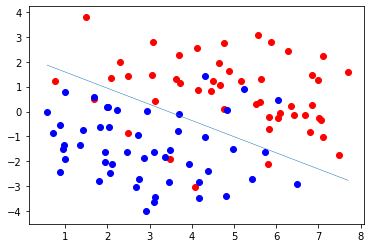

In [130]:
plt.scatter(x[1, np.where(y==1)], x[2, np.where(y==1)], color='red')
plt.scatter(x[1, np.where(y==-1)], x[2, np.where(y==-1)], color='blue')

_xs = np.array([np.min(x[1,:]), np.max(x[1,:])])
_ys = (theta[0] + theta[1] * _xs) / (- theta[2])
plt.plot(_xs, _ys, lw=0.5)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [125]:
(y * x).shape

(3, 99)

(3,)